In [43]:
import glob
import json
import pandas as pd

input_files = glob.glob('data/*')
data_list = []
for file_path in input_files:
    with open(file_path, 'r') as file:
        log = json.load(file)
        stats = log['endcontext']
        data_list.append({
            'time': log['ts'],
            'user': log['user']['username'],
            'game_type': log['gametype'],
            'replay': '<a href="https://tetr.io/#R:{0}">replay</a>'.format(log['shortid']),
            'lines': stats['lines'],
            'finesse': stats['finesse']['perfectpieces'] / stats['piecesplaced'],
            'kps': stats['inputs'] / stats['finalTime'],
            'kpp': stats['inputs'] / stats['piecesplaced'],
            'score': stats['score'],
            'level': stats['level'],
            'finesse_faults': stats['finesse']['faults'],
            'finesse_perfect_pieces': stats['finesse']['perfectpieces'],
            'keys': stats['inputs'],
            'pieces': stats['piecesplaced'],
            
        })
data_original = pd.DataFrame.from_records(data_list)\
    .sort_values(by=['time'])\
    .query('user == "miaowl"')
#     .sort_values(by=['lines'], ascending=False)
    
data_original.style\
    .bar(subset=['lines'], color='#99d8c9')\
    .bar(subset=['finesse', 'kps'], color='#a6bddb')\
    .bar(subset=['kpp'], color='#fec44f')\
    .set_properties(**{'border-left': '1px solid gray'})

,time,user,game_type,replay,lines,finesse,kps,kpp,score,level,finesse_faults,finesse_perfect_pieces,keys,pieces
10,2021-07-17T22:15:45.382Z,miaowl,blitz,replay,28,0.560000,0.002292,3.666667,14942,5,68,42,275,75
9,2021-07-17T22:25:58.523Z,miaowl,blitz,replay,30,0.584416,0.002458,3.831169,18426,5,76,45,295,77
7,2021-07-17T22:29:11.414Z,miaowl,blitz,replay,35,0.744444,0.002475,3.300000,22588,6,43,67,297,90
5,2021-07-18T00:34:48.331Z,miaowl,blitz,replay,35,0.806452,0.002383,3.075269,21070,6,31,75,286,93
0,2021-07-18T04:00:04.888Z,miaowl,blitz,replay,18,0.785714,0.001458,3.125000,9384,4,19,44,175,56
4,2021-07-18T04:03:27.790Z,miaowl,blitz,replay,24,0.822581,0.001517,2.935484,11180,5,23,51,182,62
3,2021-07-18T04:16:10.470Z,miaowl,blitz,replay,26,0.671642,0.001775,3.179104,13390,5,44,45,213,67
6,2021-07-18T06:07:38.975Z,miaowl,blitz,replay,20,0.844828,0.001508,3.120690,9872,4,16,49,181,58


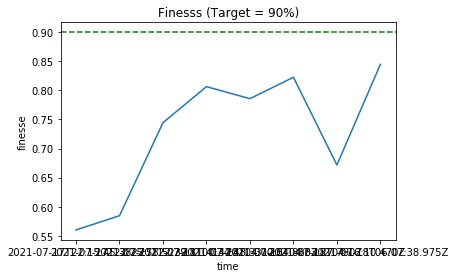

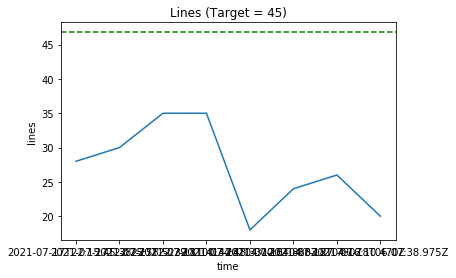

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

data = data_original.query('user == "miaowl"')
g = sns.lineplot(
    data=data,
    x="time", y="finesse"
)
plt.title('Finesss (Target = 90%)')
plt.axhline(y=.9, color='g', linestyle='--')
plt.show()

data = data_original.query('user == "miaowl"')
g = sns.lineplot(
    data=data,
    x="time", y="lines"
)
plt.title('Lines (Target = 45)')
plt.axhline(y=156*.3, color='g', linestyle='--')
plt.show()

